In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sb
from termcolor import colored as cl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge, ElasticNet
from sklearn.metrics import explained_variance_score as evs
from sklearn.metrics import r2_score as r2

In [2]:
sb.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (20, 10)

df = pd.read_csv('data/House_edited.csv')
# df.set_index("Id", inplace=True)

print(df.head(5))

df.dropna(inplace=True)

print(cl(df.isnull().sum(), attrs=['bold']))

print(df.describe())  # Get statistical view of the data such as mean, median, standard deviation...

print(cl(df.dtypes, attrs=['bold']))

   Unnamed: 0     price  area  bedrooms  bathrooms  stories  mainroad  \
0           0  13300000  7420         4          2        3         1   
1           1  12250000  8960         4          4        4         1   
2           2  12250000  9960         3          2        2         1   
3           3  12215000  7500         4          2        2         1   
4           4  11410000  7420         4          1        2         1   

   guestroom  basement  hotwaterheating  airconditioning  parking  prefarea  \
0          0         0                0                1        2         1   
1          0         0                0                1        3         0   
2          0         1                0                0        2         1   
3          0         1                0                1        3         1   
4          1         1                0                1        2         0   

   furnishingstatus  
0                 1  
1                 1  
2                 2 

In [3]:
def change_to_integers():
    items = ['mainroad', "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"]
    for item in items:
        df[item] = df[item].replace({"yes": 1, "no": 0})

    df['furnishingstatus'] = df['furnishingstatus'].replace({"furnished": 1, "unfurnished": 0, "semi-furnished": 2})

    df.to_csv("data/House_edited.csv")

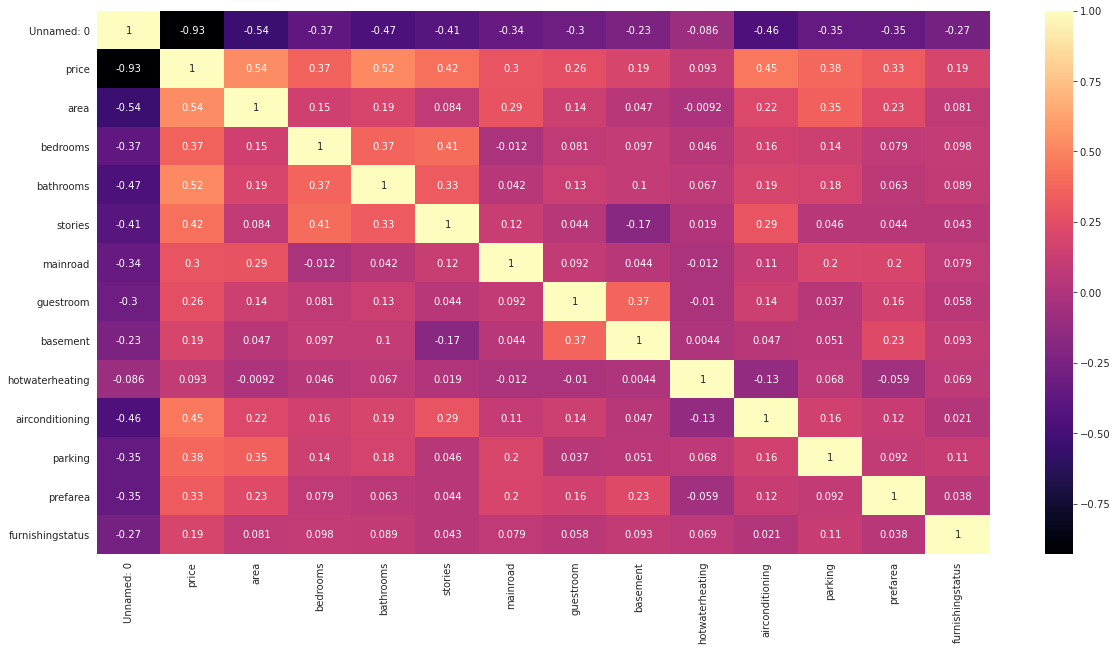

In [4]:
sb.heatmap(df.corr(), annot=True, cmap='magma')
plt.savefig('data/heatmap.png')

/home/maina/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


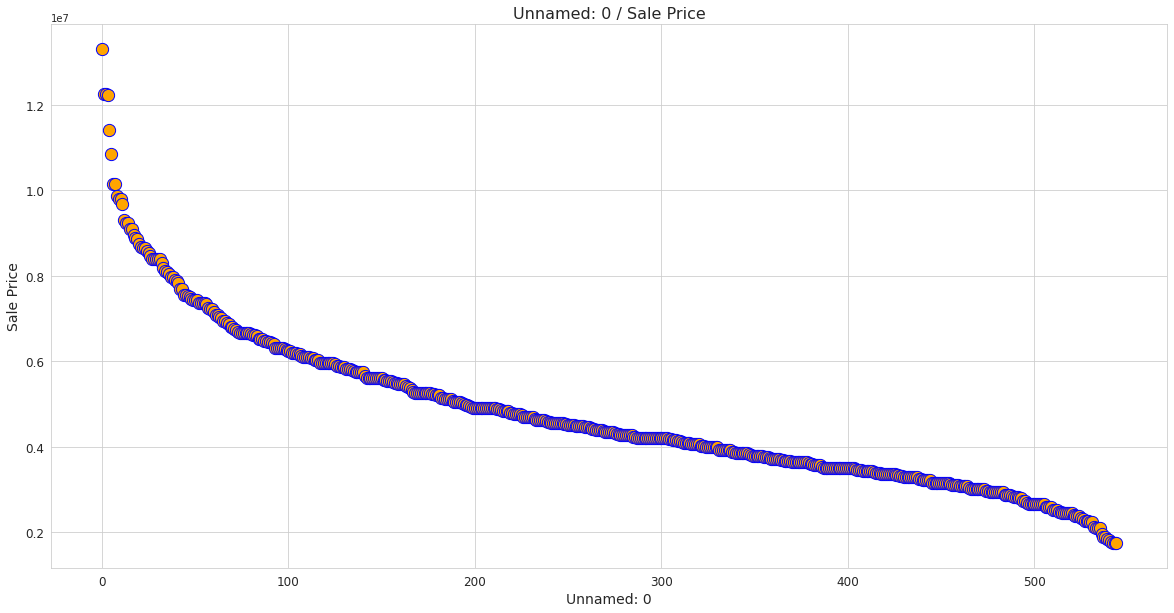

/home/maina/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


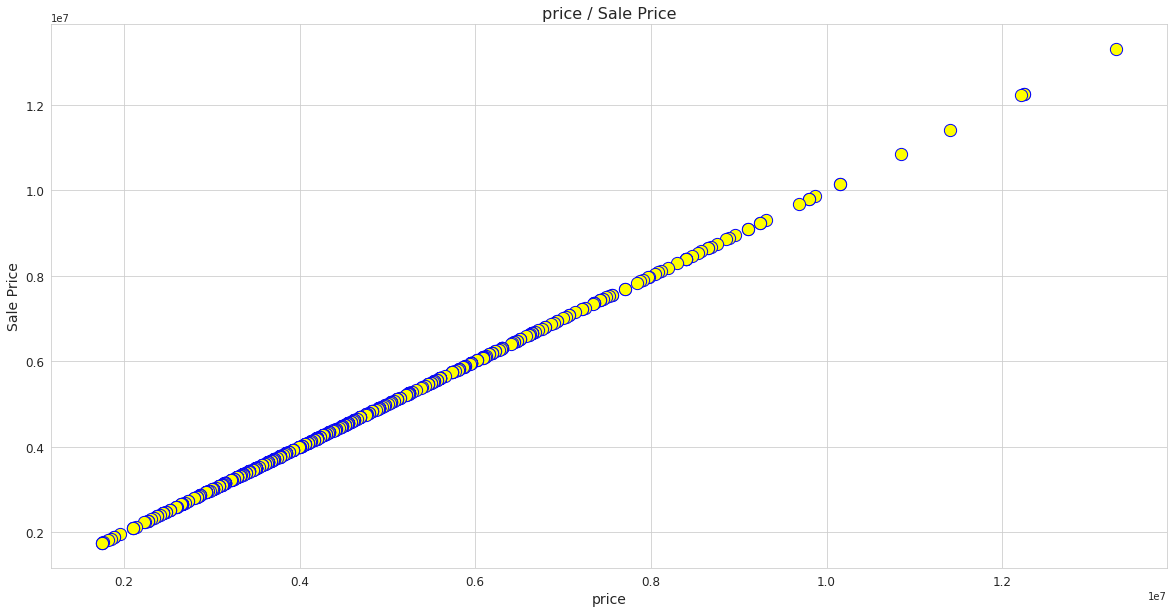

/home/maina/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


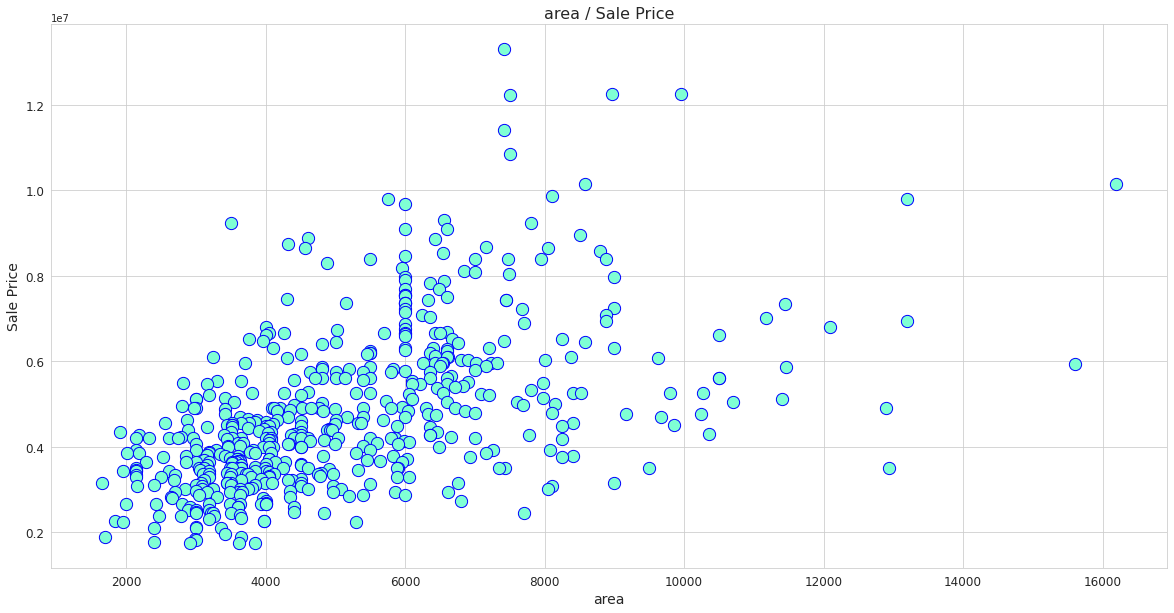

/home/maina/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


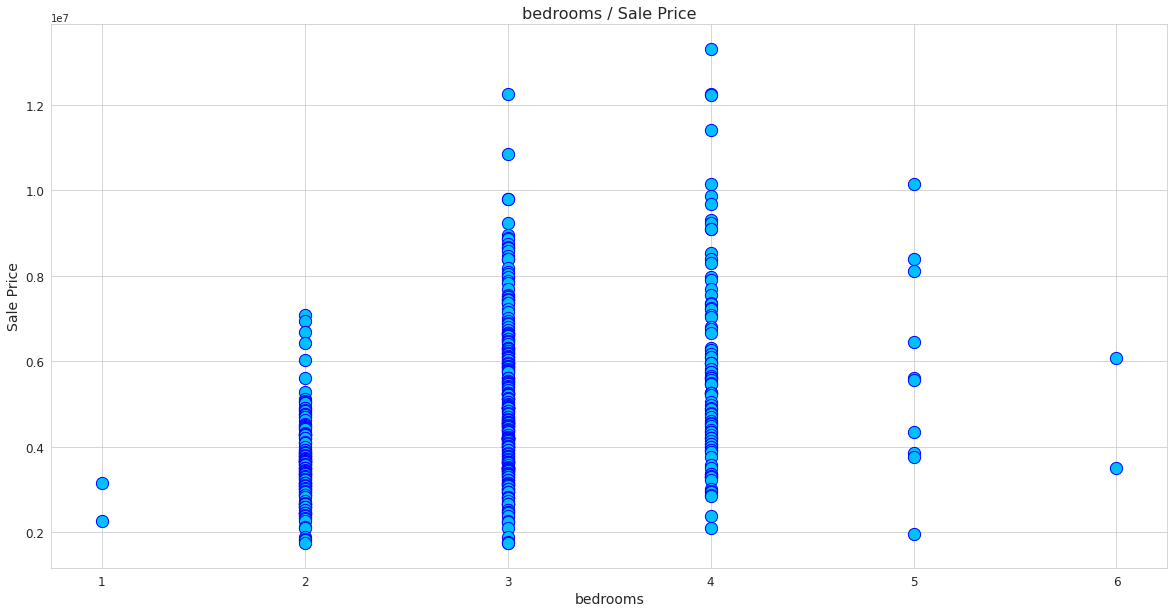

/home/maina/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


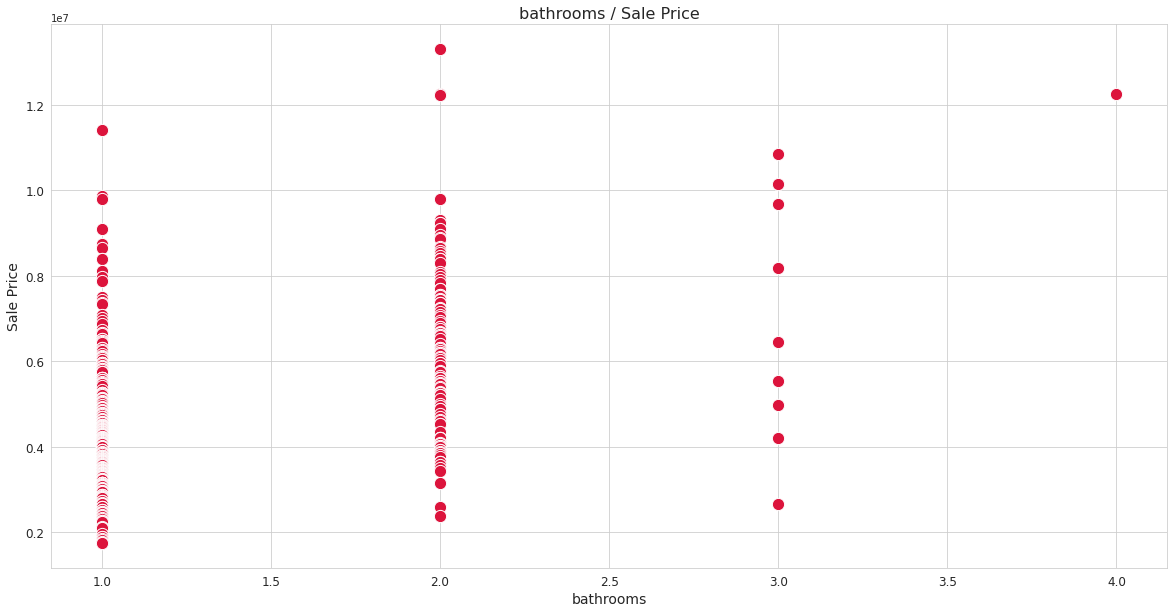

/home/maina/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


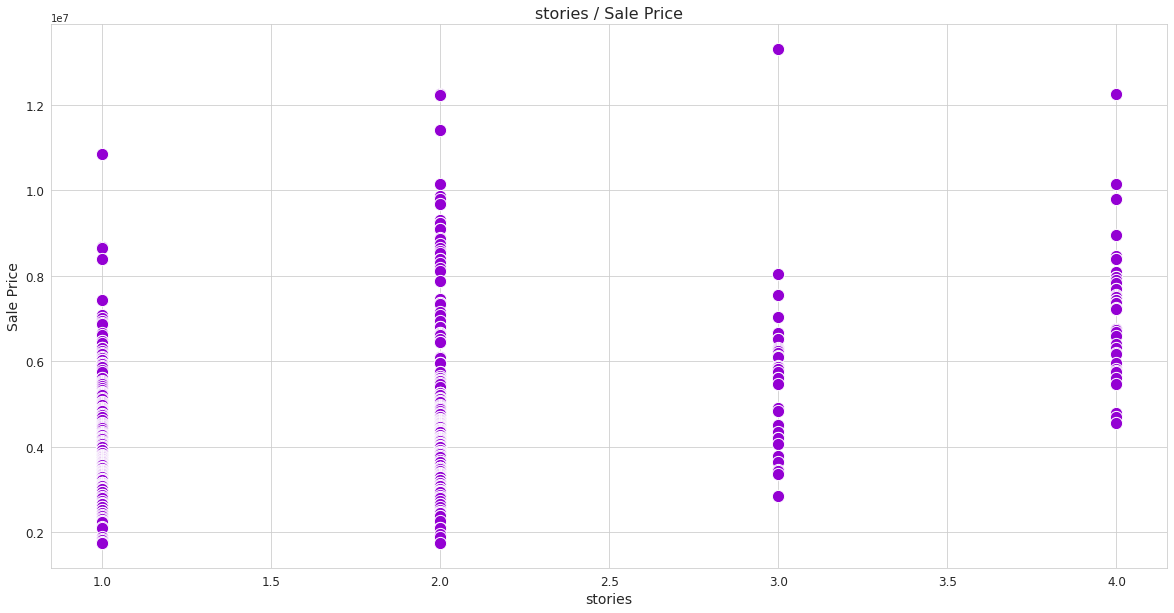

/home/maina/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


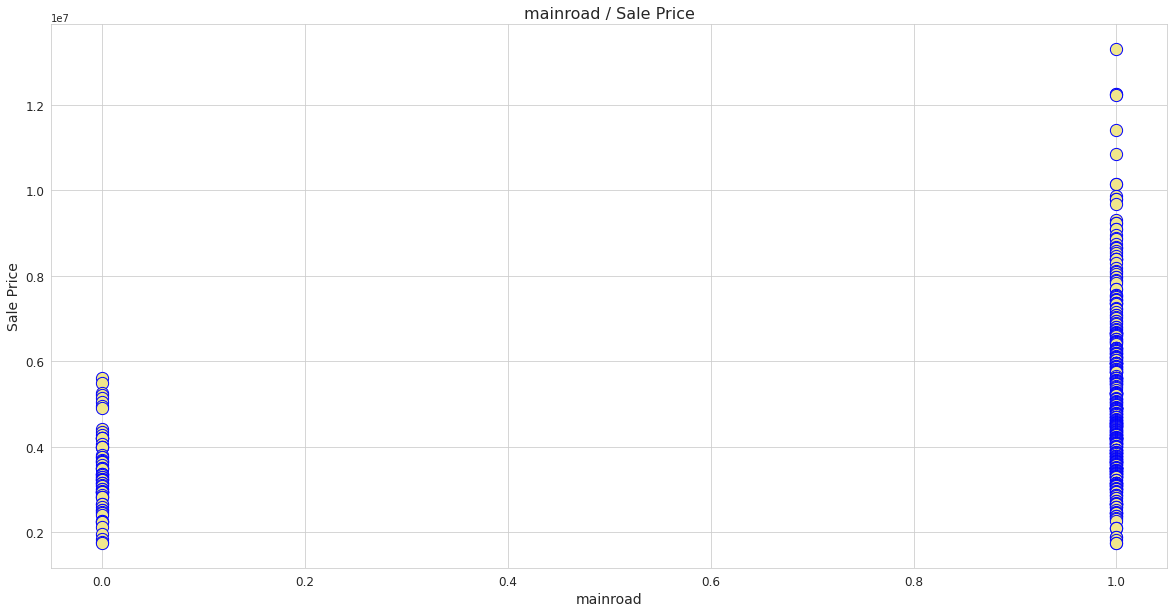

/home/maina/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


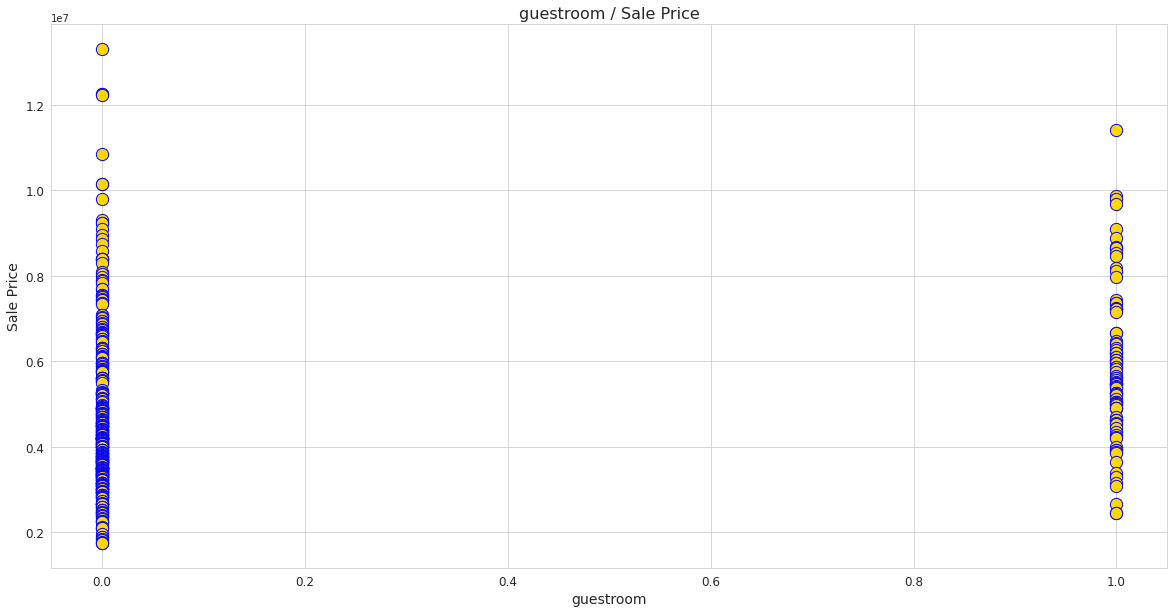

/home/maina/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


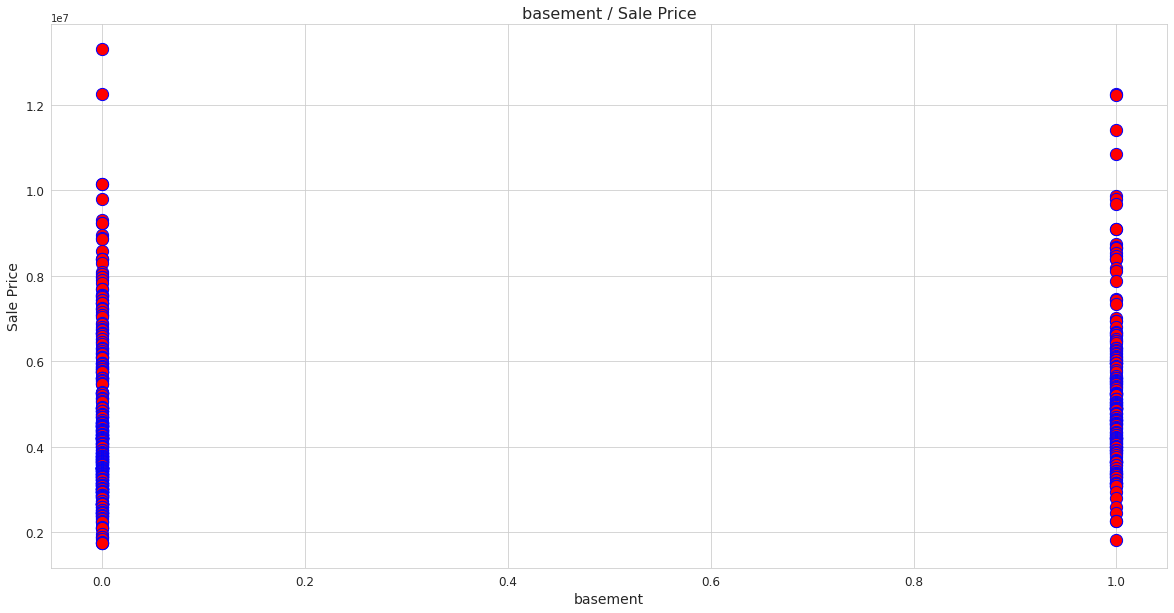

/home/maina/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


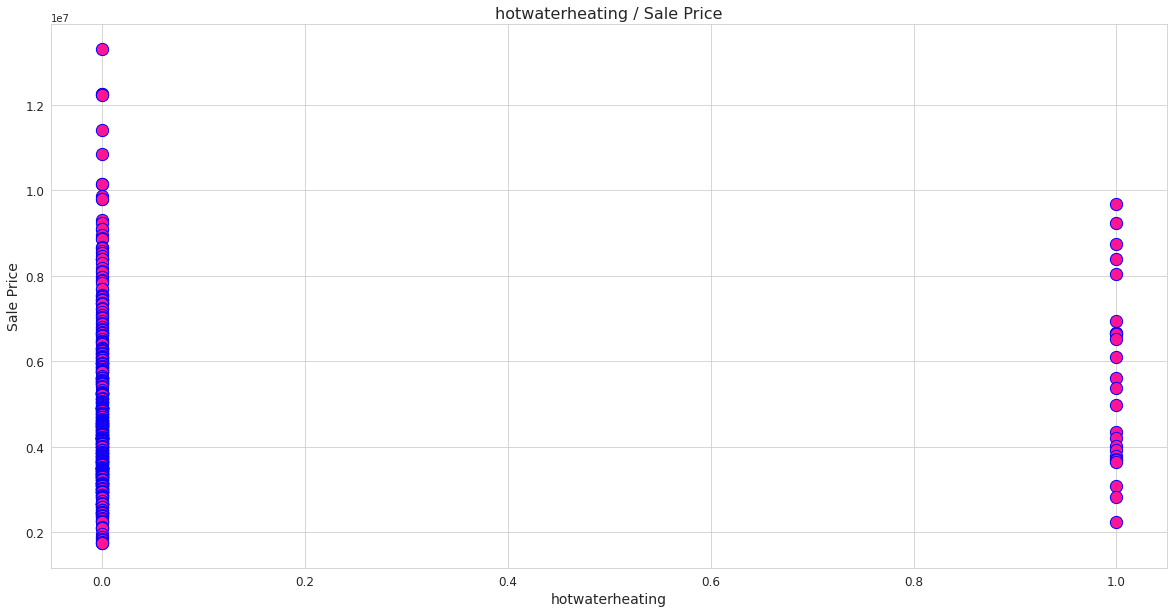

In [5]:
def scatter_df(y_var):
    scatter_df = df.drop(y_var, axis=1)
    i = df.columns

    plot1 = sb.scatterplot(i[0], y_var, data=df, color='orange', edgecolor='b', s=150)
    plt.title('{} / Sale Price'.format(i[0]), fontsize=16)
    plt.xlabel('{}'.format(i[0]), fontsize=14)
    plt.ylabel('Sale Price', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.savefig('data/scatter1.png')
    plt.show()

    plot2 = sb.scatterplot(i[1], y_var, data=df, color='yellow', edgecolor='b', s=150)
    plt.title('{} / Sale Price'.format(i[1]), fontsize=16)
    plt.xlabel('{}'.format(i[1]), fontsize=14)
    plt.ylabel('Sale Price', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.savefig('data/scatter2.png')
    plt.show()

    plot3 = sb.scatterplot(i[2], y_var, data=df, color='aquamarine', edgecolor='b', s=150)
    plt.title('{} / Sale Price'.format(i[2]), fontsize=16)
    plt.xlabel('{}'.format(i[2]), fontsize=14)
    plt.ylabel('Sale Price', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.savefig('data/scatter3.png')
    plt.show()

    plot4 = sb.scatterplot(i[3], y_var, data=df, color='deepskyblue', edgecolor='b', s=150)
    plt.title('{} / Sale Price'.format(i[3]), fontsize=16)
    plt.xlabel('{}'.format(i[3]), fontsize=14)
    plt.ylabel('Sale Price', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.savefig('data/scatter4.png')
    plt.show()

    plot5 = sb.scatterplot(i[4], y_var, data=df, color='crimson', edgecolor='white', s=150)
    plt.title('{} / Sale Price'.format(i[4]), fontsize=16)
    plt.xlabel('{}'.format(i[4]), fontsize=14)
    plt.ylabel('Sale Price', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.savefig('data/scatter5.png')
    plt.show()

    plot6 = sb.scatterplot(i[5], y_var, data=df, color='darkviolet', edgecolor='white', s=150)
    plt.title('{} / Sale Price'.format(i[5]), fontsize=16)
    plt.xlabel('{}'.format(i[5]), fontsize=14)
    plt.ylabel('Sale Price', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.savefig('data/scatter6.png')
    plt.show()

    plot7 = sb.scatterplot(i[6], y_var, data=df, color='khaki', edgecolor='b', s=150)
    plt.title('{} / Sale Price'.format(i[6]), fontsize=16)
    plt.xlabel('{}'.format(i[6]), fontsize=14)
    plt.ylabel('Sale Price', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.savefig('data/scatter7.png')
    plt.show()

    plot8 = sb.scatterplot(i[7], y_var, data=df, color='gold', edgecolor='b', s=150)
    plt.title('{} / Sale Price'.format(i[7]), fontsize=16)
    plt.xlabel('{}'.format(i[7]), fontsize=14)
    plt.ylabel('Sale Price', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.savefig('data/scatter8.png')
    plt.show()

    plot9 = sb.scatterplot(i[8], y_var, data=df, color='r', edgecolor='b', s=150)
    plt.title('{} / Sale Price'.format(i[8]), fontsize=16)
    plt.xlabel('{}'.format(i[8]), fontsize=14)
    plt.ylabel('Sale Price', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.savefig('data/scatter9.png')
    plt.show()

    plot10 = sb.scatterplot(i[9], y_var, data=df, color='deeppink', edgecolor='b', s=150)
    plt.title('{} / Sale Price'.format(i[9]), fontsize=16)
    plt.xlabel('{}'.format(i[9]), fontsize=14)
    plt.ylabel('Sale Price', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.savefig('data/scatter10.png')
    plt.show()


scatter_df('price')

In [6]:
# Distribution plot
def dist_plot():
    sb.distplot(df['price'], color='r')
    plt.title('Sale Price Distribution', fontsize=16)
    plt.xlabel('Sale Price', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.savefig('distplot.png')

In [7]:
def feature_sel_data_split():
    x_var = df[["area", "bedrooms", "bathrooms", "stories", "mainroad", "guestroom", "basement", "hotwaterheating",
                "airconditioning", "parking", "prefarea", "furnishingstatus"]]
    y_var = df["price"]

    x_train, x_test, y_train, y_test = train_test_split(x_var, y_var, test_size=0.2, random_state=0)

    return x_train, x_test, y_train, y_test

In [8]:
## Modeling
def model():
    x_train, x_test, y_train, y_test = feature_sel_data_split()
    model_1 = LinearRegression()
    model_1.fit(x_train, y_train)
    model_1_result = model_1.predict(x_test)
    model_1_file = open("data/linear_reg.model", 'wb')
    pickle.dump(model_1, model_1_file)
    model_1_file.close()

    ridge = Ridge(alpha=0.5)
    ridge.fit(x_train, y_train)
    ridge_result = ridge.predict(x_test)
    ridge_file = open("data/ridge.model", 'wb')
    pickle.dump(ridge, ridge_file)
    ridge_file.close()

    lasso = Lasso(alpha=0.01)
    lasso.fit(x_train, y_train)
    lasso_result = lasso.predict(x_test)
    lasso_file = open("data/lasso.model", 'wb')
    pickle.dump(lasso, lasso_file)
    lasso_file.close()

    bayesian = BayesianRidge()
    bayesian.fit(x_train, y_train)
    bayesian_result = bayesian.predict(x_test)
    bayesian_file = open("data/bayesian.model", 'wb')
    pickle.dump(bayesian, bayesian_file)
    bayesian_file.close()

    elastic = ElasticNet(alpha=0.01)
    elastic.fit(x_train, y_train)
    elastic_result = elastic.predict(x_test)
    elastic_file = open("data/elastic.model", 'wb')
    pickle.dump(elastic, elastic_file)
    elastic_file.close()

    return y_test, [model_1_result, ridge_result, elastic_result, lasso_result, bayesian_result]


In [9]:
y_test, results = model()
for result in results:
    score = evs(result, y_test)
    print(score)

0.5980139834355488
0.5987228811202733
0.6001074598242286
0.5980139872157975
-0.7034861780384147
